In [122]:
import pandas as pd                       # Data manipulation and analysis
import numpy as np                        # Numerical operations
import matplotlib.pyplot as plt           # Data visualization
import seaborn as sns                     # Enhanced data visualization
from sklearn.model_selection import train_test_split     # Splitting the dataset
from sklearn.preprocessing import StandardScaler        # Feature scaling
from sklearn.linear_model import LinearRegression        # Linear regression model
from sklearn.tree import DecisionTreeRegressor           # Decision tree regressor
from sklearn.ensemble import RandomForestRegressor       # Random forest regressor
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression, SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [123]:
# Load the dataset
Data = pd.read_csv('OneDrive/Desktop/Clean_Dataset.csv')

# Exploratory Data Analysis (EDA)

In [135]:
Data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [125]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Let's drop the "Unnamed: 0" column whichn is not required

In [126]:
Data = Data.drop("Unnamed: 0", axis = 1)

In [127]:
Data.shape 

(300153, 11)

In [128]:
# To Get information about the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [129]:
# To get Summary statistics of the dataset
Data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [130]:
# To Check for missing values
Data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Our dataset do not have any null/nan/missing values.

# Visualisation - intended outcomes


1. Does price vary with Airlines?


<AxesSubplot:xlabel='airline', ylabel='price'>

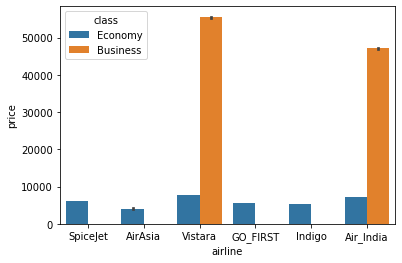

In [10]:
sns.barplot(data=Data, x='airline', y='price', hue='class')

Business flights are only available in two companies: Air India and Vistara.
Price varies with Airlines.
Economy Class Vistara is the most expensive and Air Asia is the least expensive whereas, in the Business Class, Vistara is the most expensive and Air India is the least expensive

1.How does the ticket price vary between Economy and Business class?¶

In [11]:
# Visualize ticket price variation between Economy and Business class

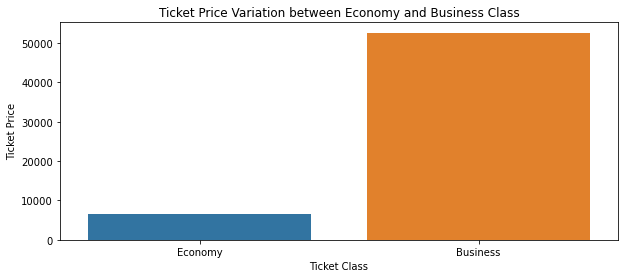

In [12]:
plt.figure(figsize=(10, 4))
sns.barplot(data=Data, x='class', y='price')
plt.xlabel('Ticket Class')
plt.ylabel('Ticket Price')
plt.title('Ticket Price Variation between Economy and Business Class')
plt.show()






2. How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [13]:
# Analyze price variation with days left before departure

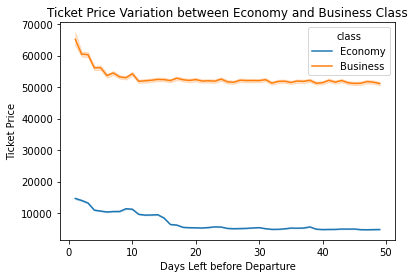

In [14]:
# Create a figure with the desired figsize
class_df =Data.groupby('class')['price'].mean().reset_index()
sns.lineplot(data=Data, x='days_left', y='price', hue='class')
plt.xlabel('Days Left before Departure')
plt.ylabel('Ticket Price')
plt.title('Ticket Price Variation between Economy and Business Class')
plt.show()

<AxesSubplot:xlabel='days_left', ylabel='price'>

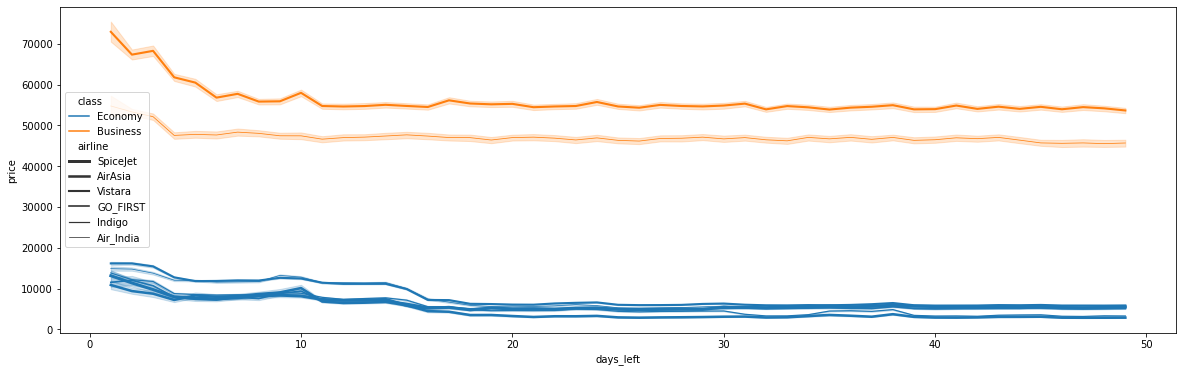

In [15]:
# Create a figure with the desired figsize
plt.figure(figsize=(20, 6))

sns.lineplot(data=Data, x='days_left', y='price', hue='class', size='airline')

 It is recommended to purchase Economy class tickets at least three weeks prior to the departure date, while for Business class tickets, it is advisable to buy them at least ten days before the scheduled departure.

##3. Does ticket price change based on the departure time and arrival time?

In [16]:
# Analyze price variation based on departure and arrival time

Text(0.5, 1.0, 'Airline prices based on the arrival time')

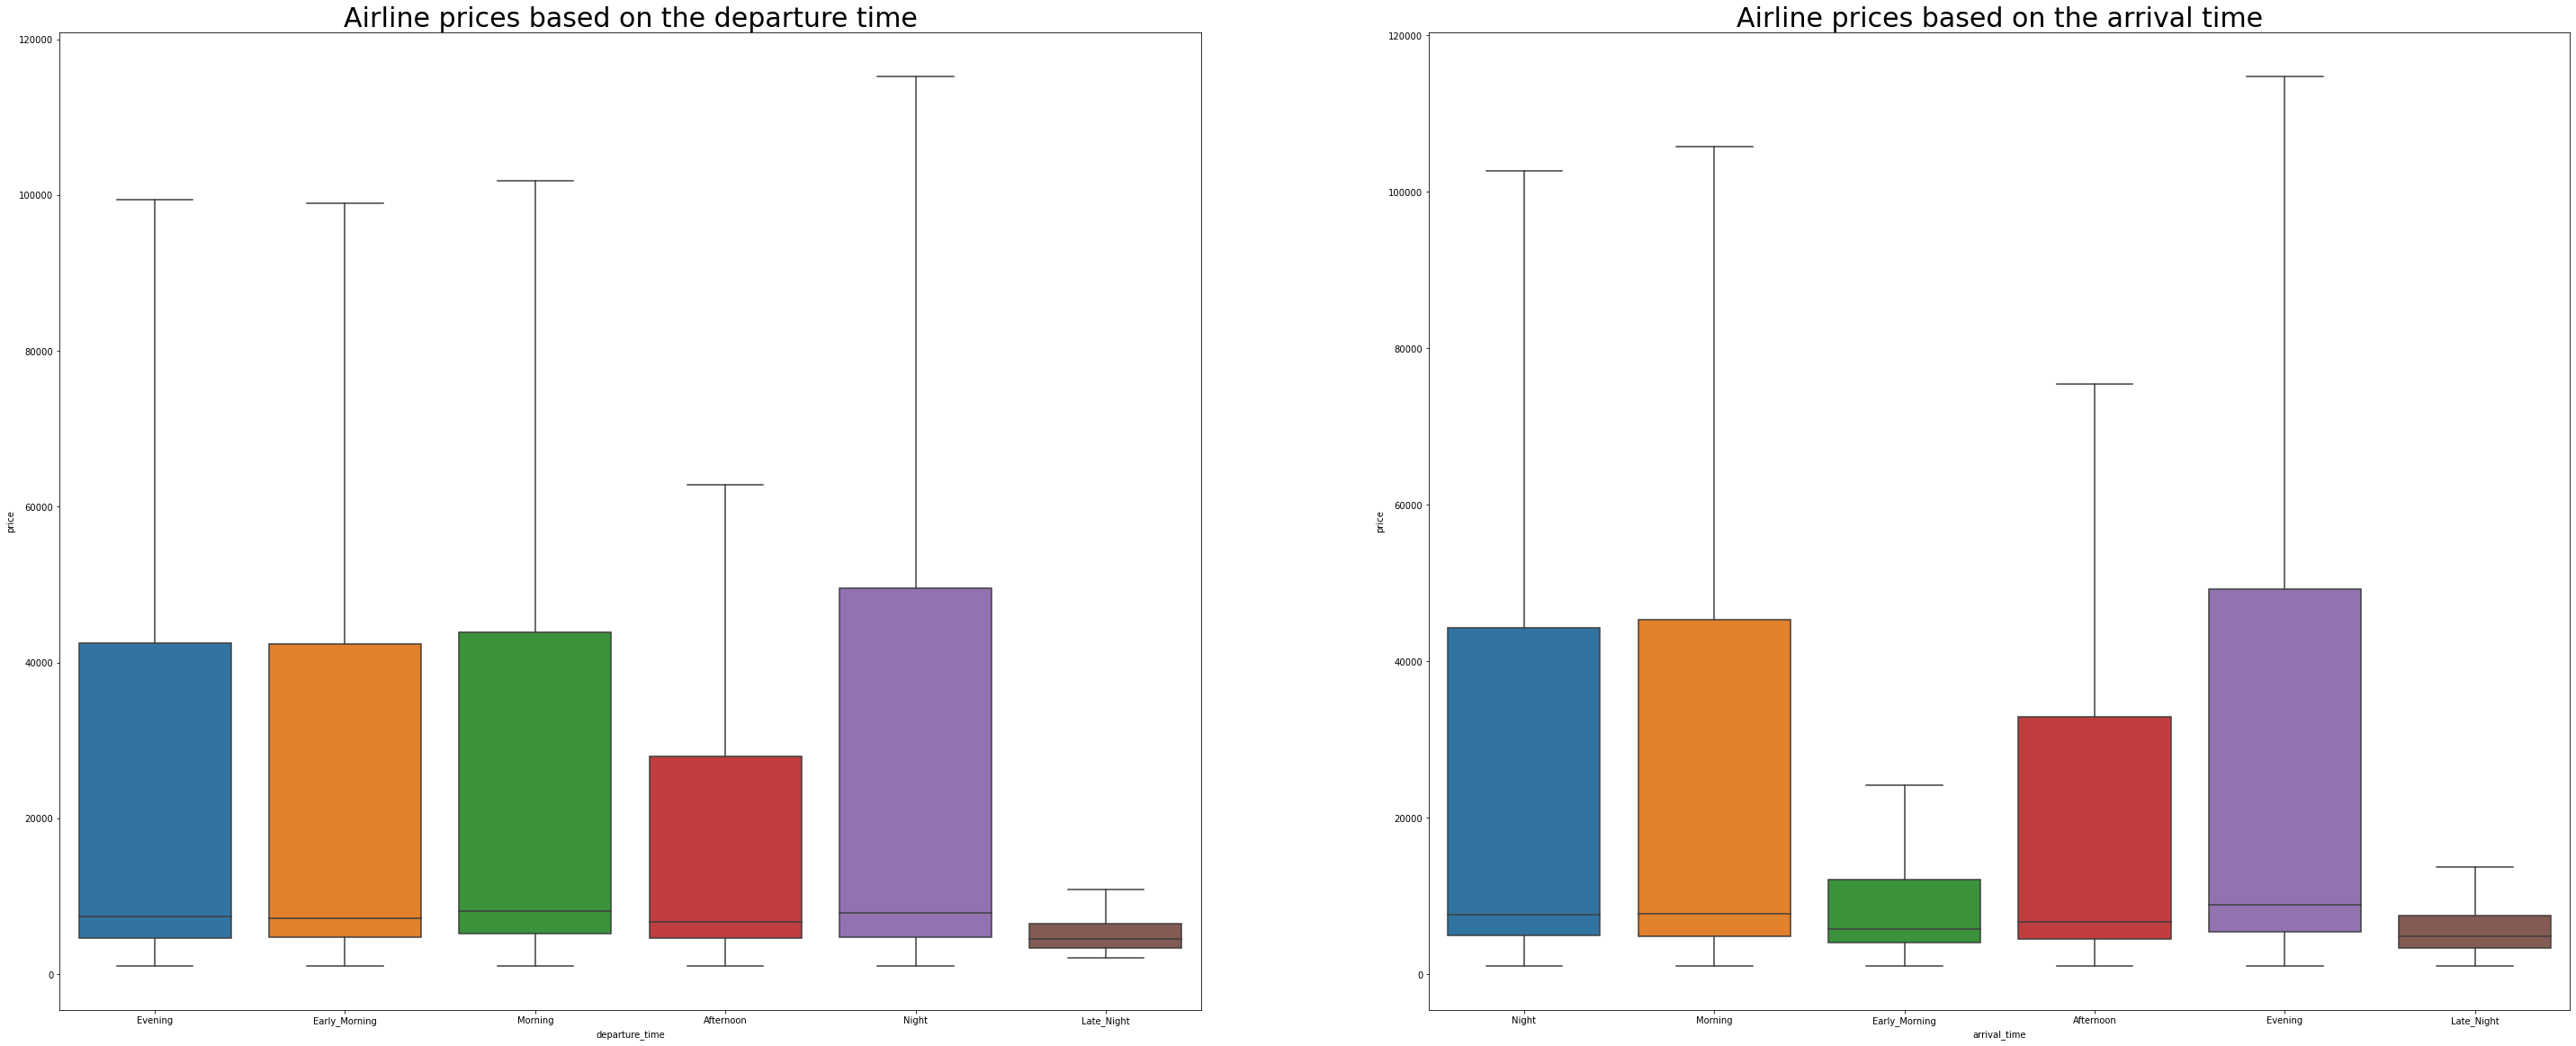

In [17]:
plt.figure(figsize = (50,20))
plt.subplot(1,2,1)
sns.boxplot(data=Data, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=30)
plt.subplot(1,2,2)
sns.boxplot(data=Data, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=30)

 leaving at night or arriving at night remains the cheapest way to travel.

In [18]:
economy_data = Data.loc[Data['class'] == 'Economy']
business_data = Data.loc[Data['class'] == 'Business']

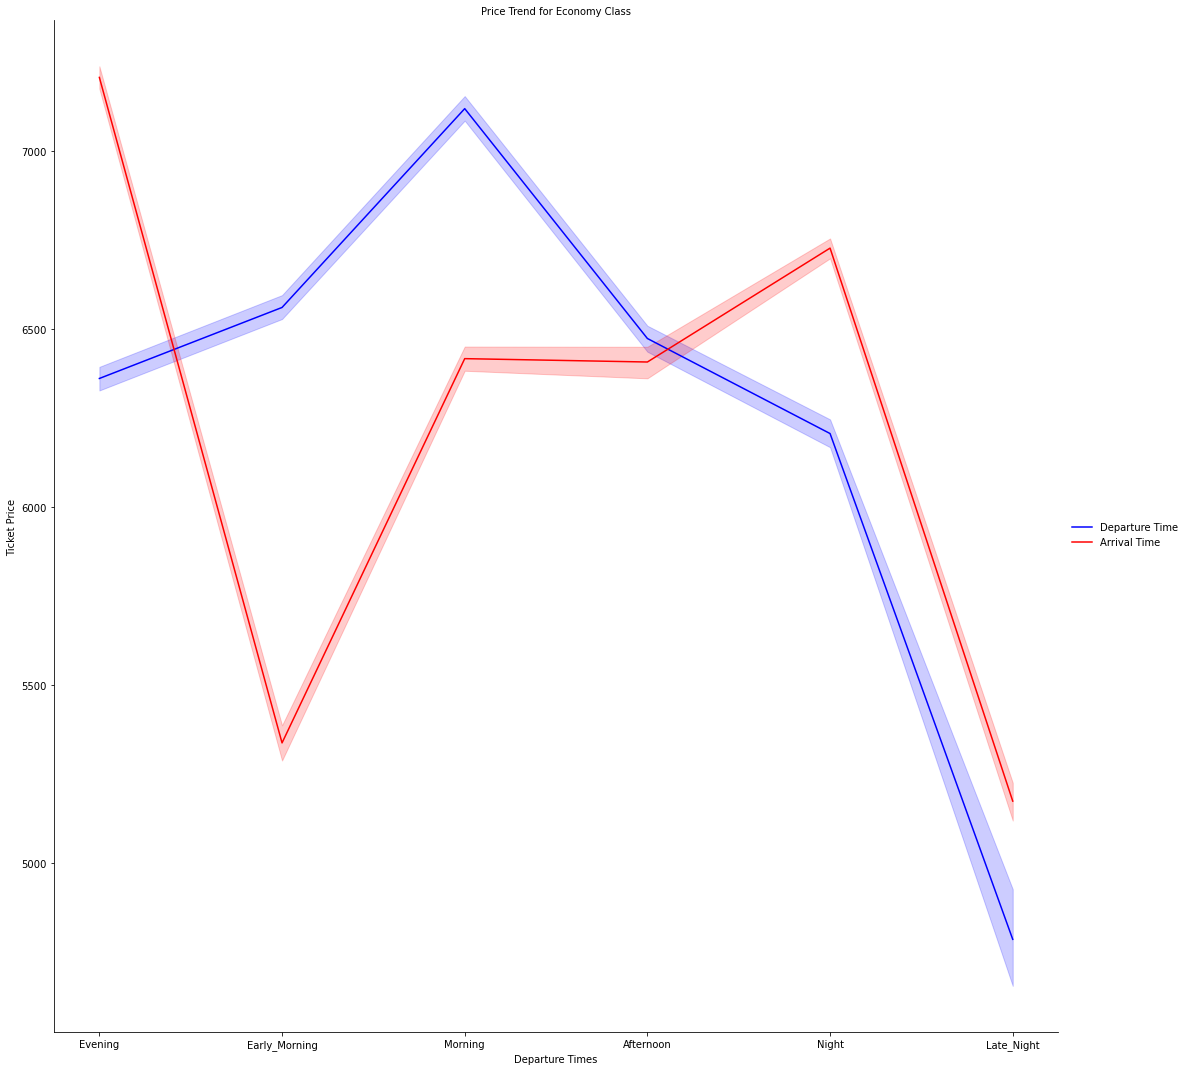

In [19]:
grid = sns.FacetGrid(economy_data, col="class", height=15)
grid.map(sns.lineplot, 'departure_time', 'price', color='blue', label='Departure Time')
grid.map(sns.lineplot, 'arrival_time', 'price', color='red', label='Arrival Time')
grid.set_axis_labels("Departure Times", "Ticket Price")
grid.add_legend()
grid.set_titles("Price Trend for Economy Class")

It is evident that the price tends to be higher for the Economy class when the departure time is in the morning, and it decreases as the day progresses, hitting a low in the evening before increasing again at night. Similarly, the price tends to be higher when the arrival time is in the afternoon or evening, with lower prices in the morning or at night.


If the arrival time is early morning then there is a drop in price.

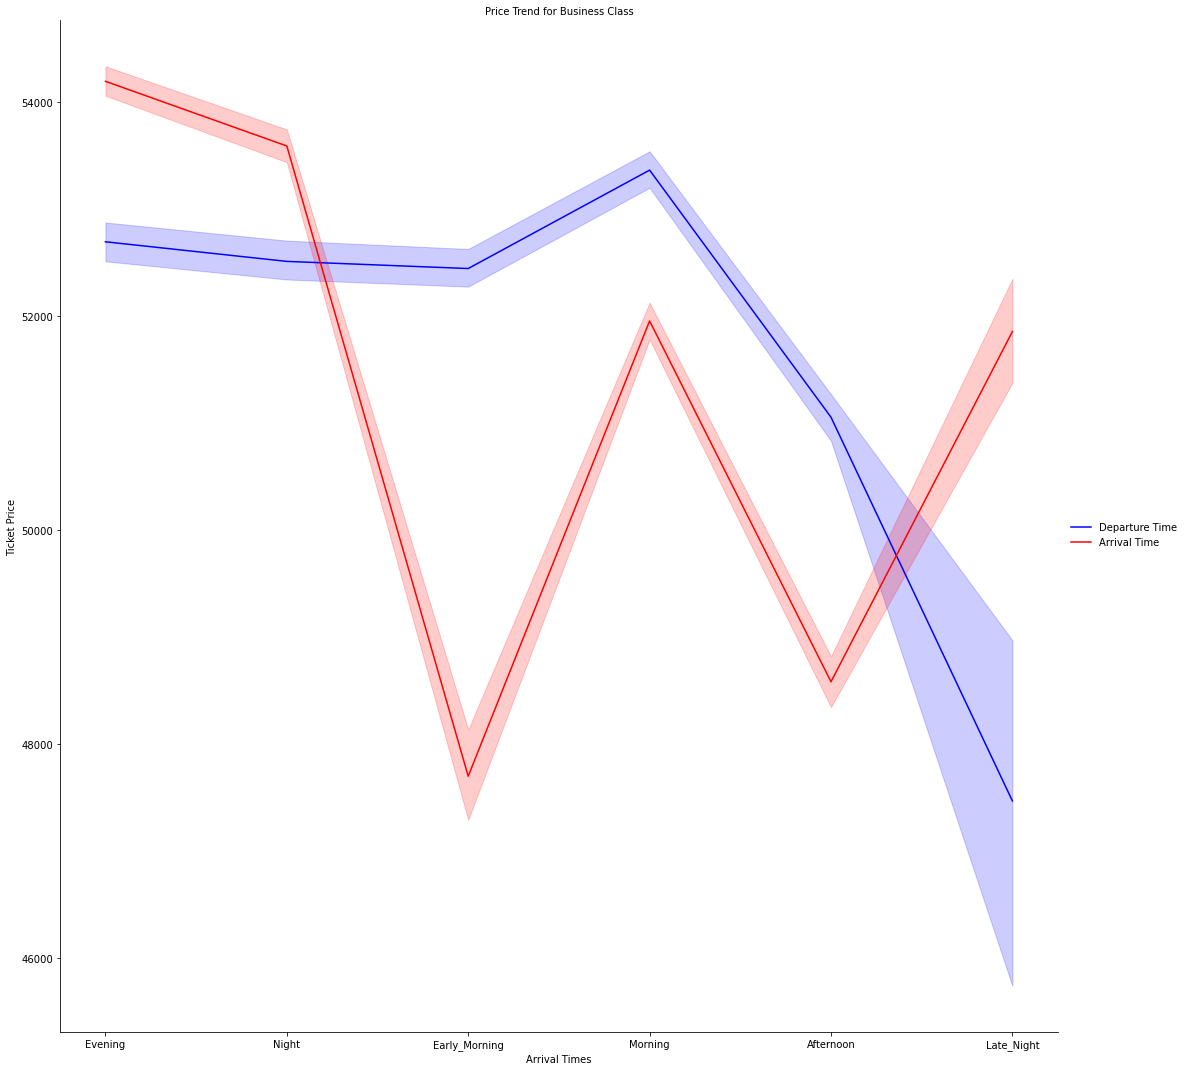

In [20]:
grid = sns.FacetGrid(business_data, col="class", height=15)
grid.map(sns.lineplot, 'departure_time', 'price', color='blue', label='Departure Time')
grid.map(sns.lineplot, 'arrival_time', 'price', color='red', label='Arrival Time')
grid.set_axis_labels("Arrival Times", "Ticket Price")
grid.add_legend()
grid.set_titles("Price Trend for Business Class")

The trend for the Business class is slightly different than that of the Economy class, with the ticket price tending to be highest in the Morning and evening, and lower in the early morning , afternoon at Late night.

4. How the price changes with change in Source and Destination?

In [21]:
# Analyze price variation based on source and destination cities

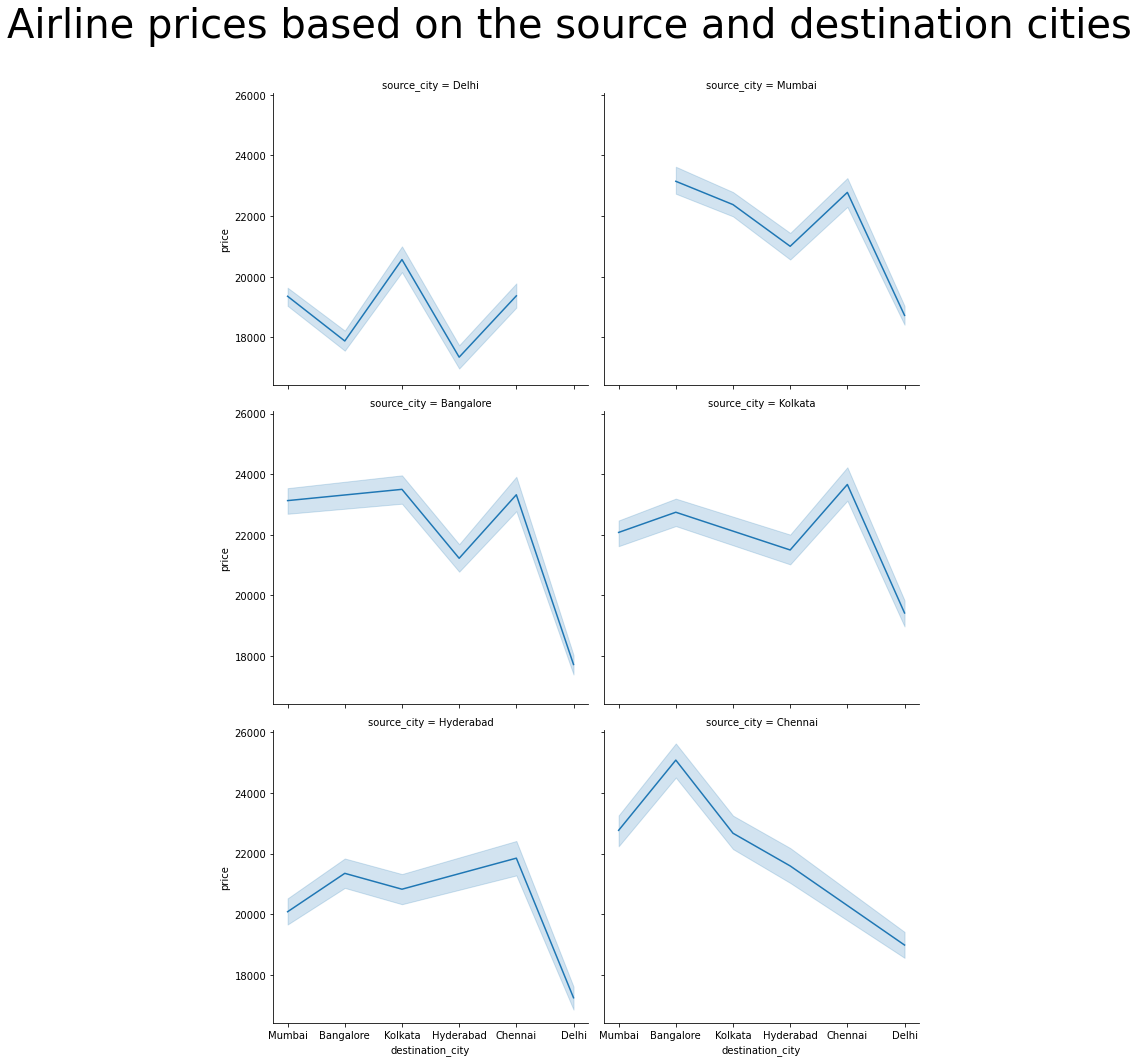

In [22]:

ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=Data, col_wrap=2)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=40)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp

****Flight leaving from Delhi are often cheaper that from other source cities and the capital is also the cheapest deatination to go probably because as a capital cities, the airport is the biggest and proposes more flights. In an other hand, the prices are more or less similar and Hyderabad being the most expensive destination.

Does the number of stops influences the price?

In [23]:
# Analyze the influence of the number of stops on price

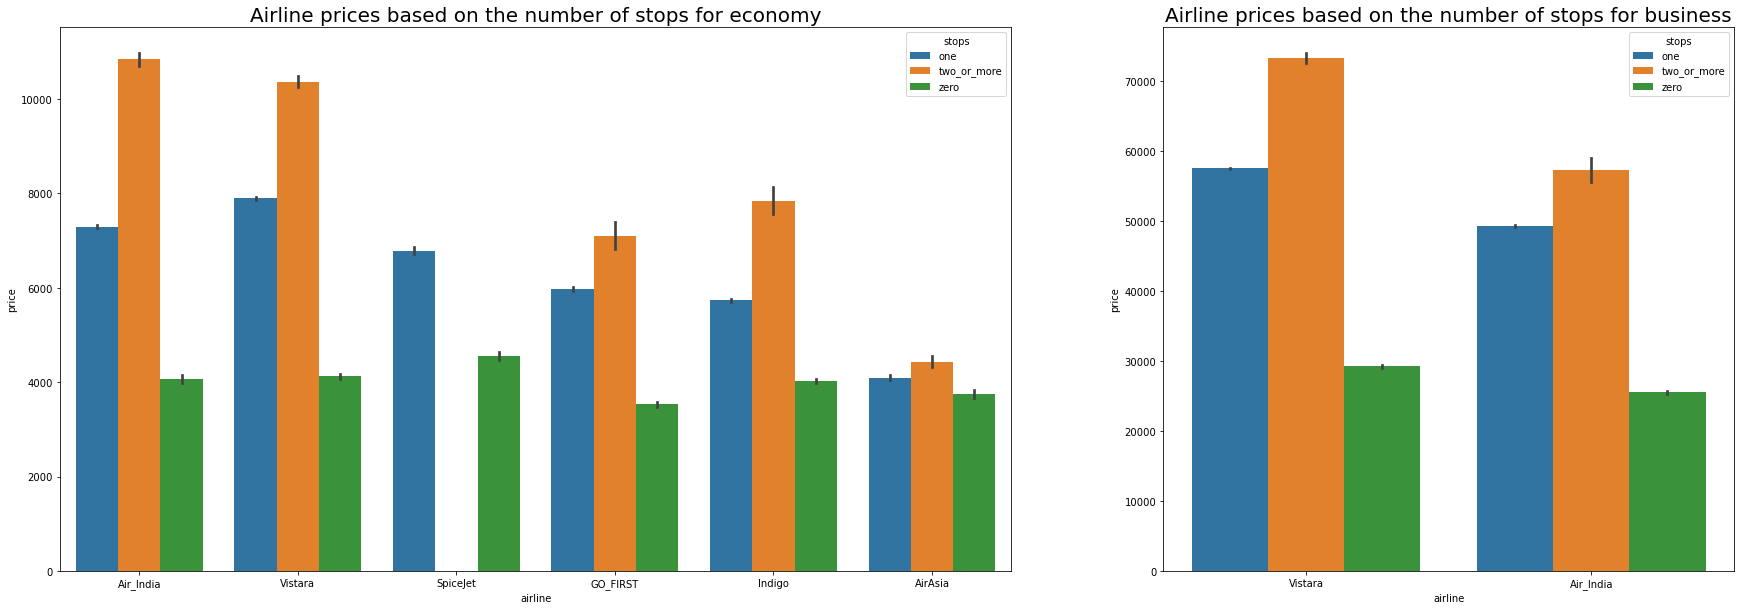

In [24]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(30, 10))
sns.barplot(y="price", x="airline", hue="stops", data=Data.loc[Data["class"]=='Economy'].sort_values("price", ascending=False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops for economy", fontsize=20)
sns.barplot(y="price", x="airline", hue="stops", data=Data.loc[Data["class"]=='Business'].sort_values("price", ascending=False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops for business", fontsize=20)
plt.show()

more stops there are the more expensive the flight is except for AirAsia where the prices seems more constant. The behaviour and different analysis of AirAsia tend to show that it is a low cost airline.

 How does the ticket price vary between Economy and Business class?

In [25]:
# Compare ticket prices between Economy and Business class

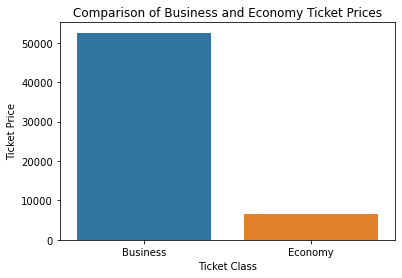

In [26]:
class_df = Data.groupby('class').apply(lambda Data: Data.price.mean())
class_df = class_df.to_frame().reset_index()
sns.barplot(data=class_df, x='class', y=0)
plt.xlabel('Ticket Class')
plt.ylabel('Ticket Price')
plt.title('Comparison of Business and Economy Ticket Prices')
plt.show()


# Data Preprocessing

In [27]:
# Find the numerical columns
numeric__Data = Data.select_dtypes(include=np.number)
numeric_columns= numeric__Data.columns
numeric_features = list(numeric_columns) 
numeric_features

['duration', 'days_left', 'price']

In [28]:
for feature in numeric_features:
    print(feature,len(Data[feature].unique()))

duration 476
days_left 49
price 12157


# Outliers Detection in the dataset

In [29]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


duration        AxesSubplot(0.125,0.125;0.227941x0.755)
days_left    AxesSubplot(0.398529,0.125;0.227941x0.755)
price        AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

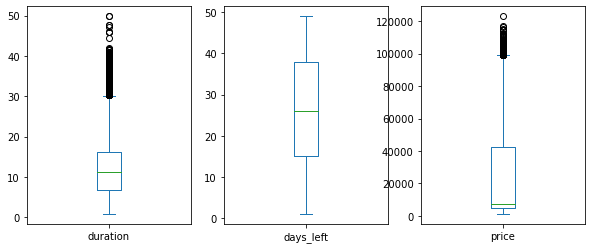

In [30]:
Data.plot(kind = "box", figsize = (10,4), subplots = True)

Detailed understanding of the data distribution:



array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'days_left'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

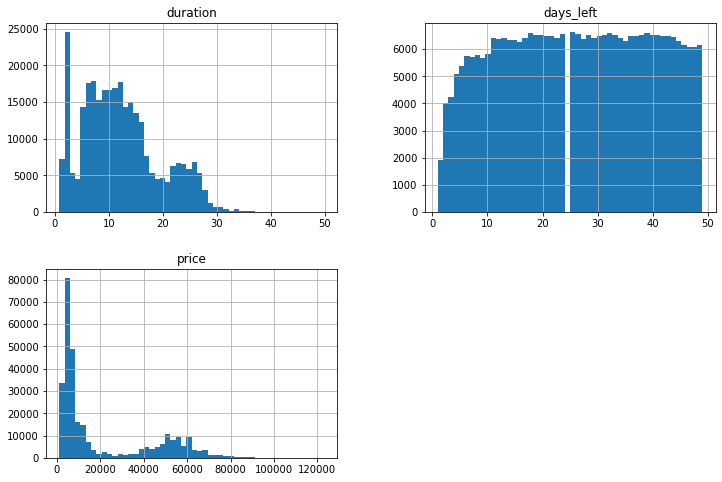

In [31]:
Data.hist(bins = 50, figsize= (12,8))

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

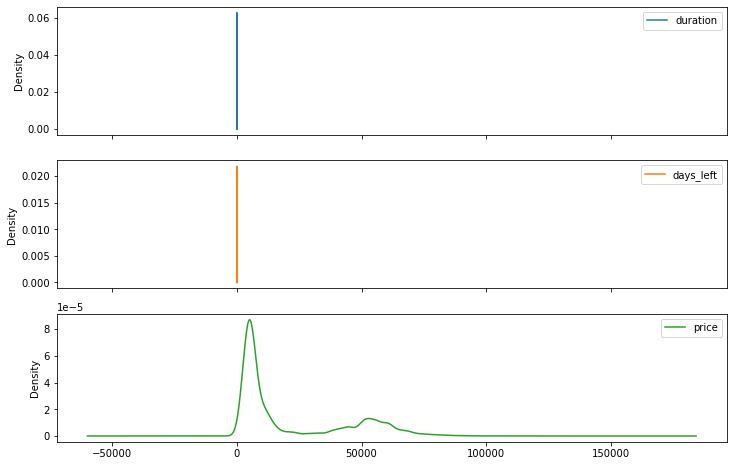

In [32]:
Data.plot(kind = "density", subplots = True,  figsize = (12,8))

In [33]:
# Select the column(s) with numerical data where you want to detect outliers

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


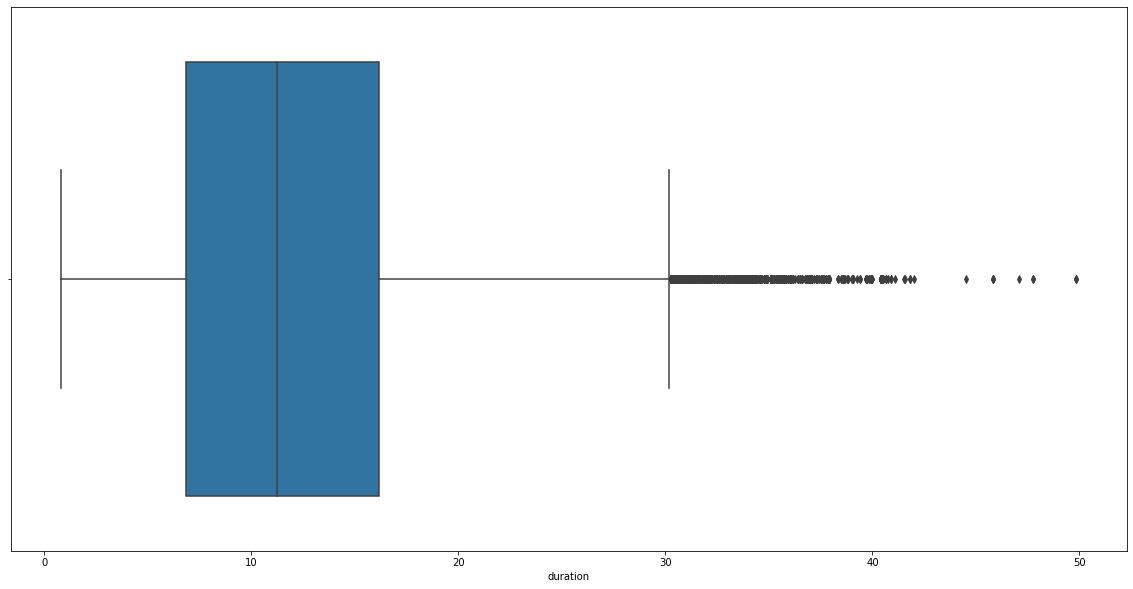

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


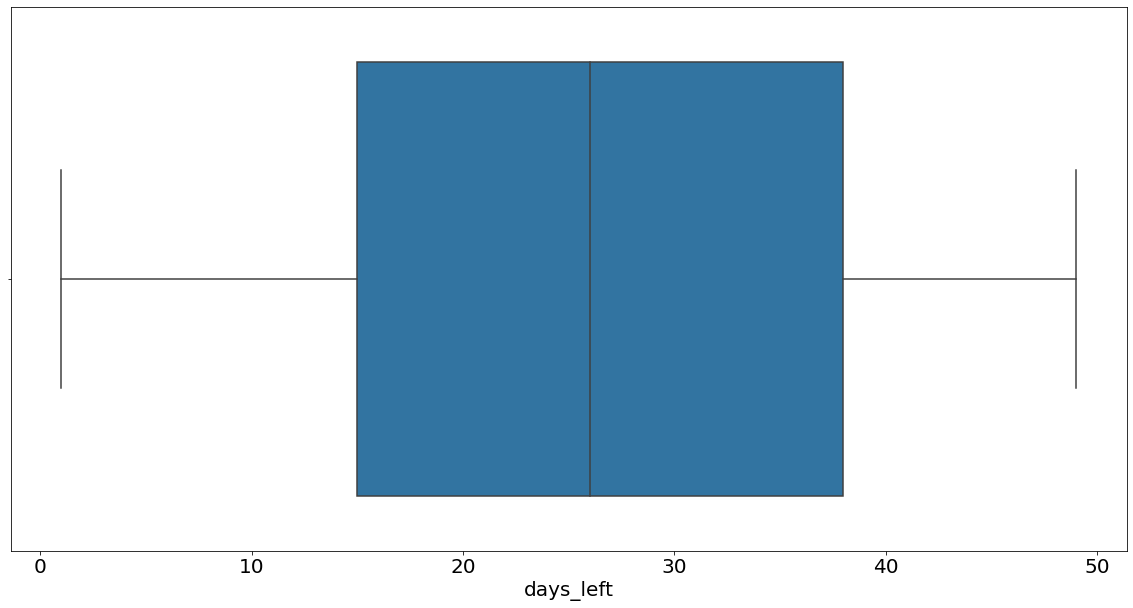

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


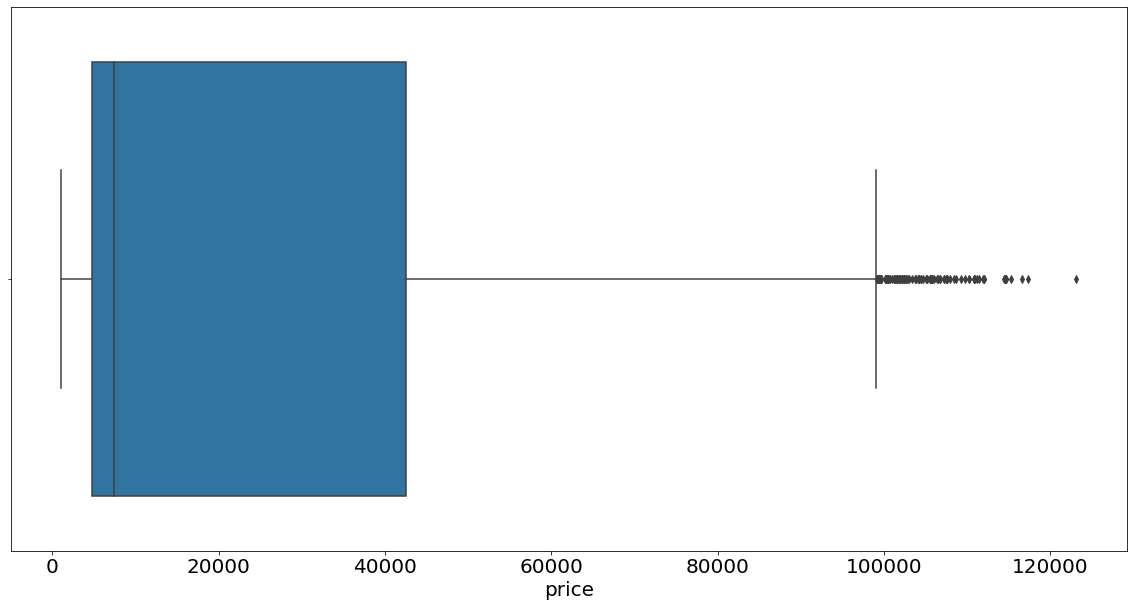

In [34]:
# Detect outliers using box plots
for feature in numeric_features:
    fig = plt.subplots(figsize=(20, 10))
    plt.rcParams.update({'font.size': 20})
    sns.boxplot(Data[feature])
    plt.xlabel(feature)
    plt.show()
    print("                                                                                           ")

In [35]:
# Detect outliers using z-scores
for column in numeric_features:
    z_scores = (Data[column] - Data[column].mean()) / Data[column].std()
    outliers = Data[abs(z_scores) > 3]  # Adjust the threshold as needed
    print(f'Outliers in {column}:')
    print(outliers)

Outliers in duration:
          airline   flight source_city departure_time        stops  \
10540   Air_India  AI-9887       Delhi  Early_Morning  two_or_more   
20464     Vistara   UK-815       Delhi        Morning  two_or_more   
20467     Vistara   UK-801       Delhi        Morning  two_or_more   
29417   Air_India   AI-481       Delhi        Morning  two_or_more   
29418   Air_India   AI-435       Delhi  Early_Morning  two_or_more   
...           ...      ...         ...            ...          ...   
283030    Vistara   UK-860   Hyderabad  Early_Morning          one   
293606  Air_India   AI-429     Chennai      Afternoon  two_or_more   
295740  Air_India   AI-509     Chennai  Early_Morning  two_or_more   
295952    Vistara   UK-836     Chennai        Morning          one   
295953    Vistara   UK-832     Chennai  Early_Morning          one   

       arrival_time destination_city     class  duration  days_left  price  
10540       Evening        Bangalore   Economy     36.92    

From the provided output, it appears that outliers have been identified for the 'duration' and 'price' columns. 


In [36]:
# Let's get the count values of the data corresponding to those outliers in each feature:
print ("'duration' feature Outliers:", Data[Data['duration']>30].count(), sep = '\n')

'duration' feature Outliers:
airline             2226
flight              2226
source_city         2226
departure_time      2226
stops               2226
arrival_time        2226
destination_city    2226
class               2226
duration            2226
days_left           2226
price               2226
dtype: int64


Outliers with their corresponding data percentage

In [37]:
(2226/300153)*100

0.7416217728958232

In [38]:
Data.groupby(['stops'])['duration'].max()

stops
one            49.83
two_or_more    49.83
zero            3.58
Name: duration, dtype: float64

The outliers in duration are a result of making layover stops between flights.
We will not remove outliers since overnight layovers and flight cancelations occur naturally.

In [39]:
# Investigate Price outliers
Data['price'].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [40]:
Data.groupby(['class'])['price'].max()

class
Business    123071
Economy      42349
Name: price, dtype: int64

In [41]:
Data.groupby(['stops'])['price'].max()

stops
one            123071
two_or_more    117307
zero            59573
Name: price, dtype: int64

In [42]:
Data['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

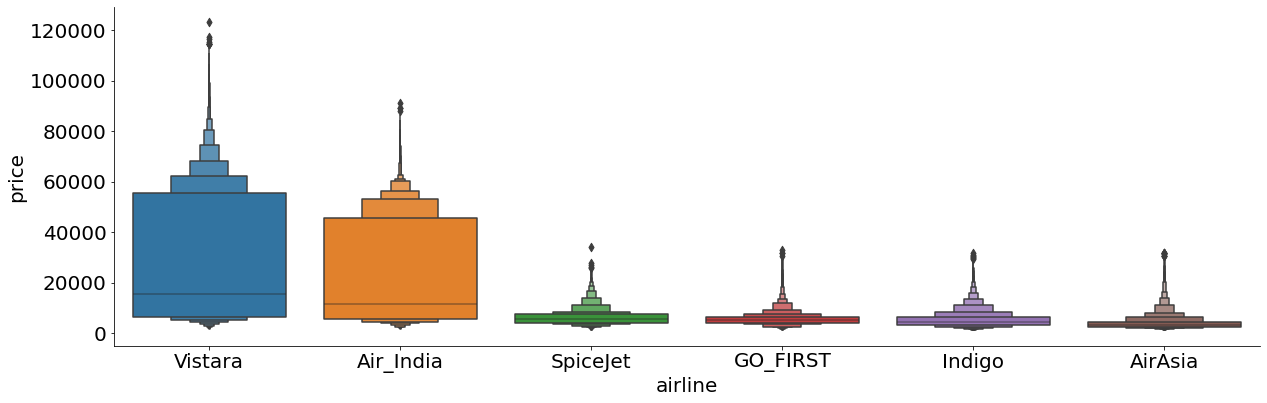

In [43]:
# Airline vs Price
sns.catplot(y = "price", x = "airline", data = Data.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

-From graph we can see that Vistara have the highest Price.
-The outliers for price are natural due to price surge that occurs naturally.

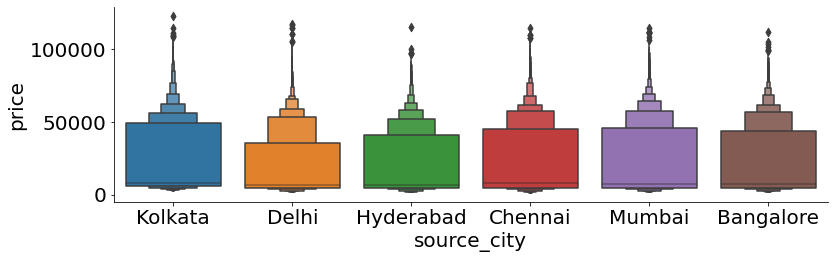

In [44]:
# source_city vs Price

sns.catplot(y = "price", x = "source_city", data = Data.sort_values("price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

For the 'duration' column, there are 722 outliers, which are flights with a duration greater than 30 hours. These outliers might be a result of layover stops between flights, including overnight layovers and flight cancellations. It is reasonable to have such outliers, so there is no need to remove them.

For the 'price' column, there are 602 outliers. These outliers might be due to natural price surges that occur, and they are not necessarily erroneous data points. Therefore, it is also not necessary to remove these outliers.

To further analyze the data distribution, generated histograms and density plots for the numerical columns. The box plots have also been used to visualize the distribution and outliers in each numerical feature.

Additionally,examined the relationship between price and other categorical features such as 'airline' and 'source_city' using boxen plots. These plots help to understand the variation in prices across different categories.

Overall, it seems that the outliers detected in the 'duration' and 'price' columns are valid and represent natural occurrences in flight durations and pricing.

# Feature encoding

#Fetching Unique Values for Relevant Features

In [45]:
for column in Data.columns:
    if column != 'duration' and column != 'price' and column != 'days_left' and column != 'Unnamed: 0' and column != 'flight':
        print(f"{column}: \n{Data[column].unique()}\n\n")

airline: 
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


source_city: 
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']


departure_time: 
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


stops: 
['zero' 'one' 'two_or_more']


arrival_time: 
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']


destination_city: 
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']


class: 
['Economy' 'Business']




In [46]:
#For categorical variables, encoding using techniques like one-hot encoding for Nominal data and label encoding for Ordinal data

In [47]:
# Find the catogorical columns
catogorical_Data = Data.select_dtypes(include= object)

In [48]:
cat_columns = catogorical_Data.columns
catogorical_features = list(cat_columns)
catogorical_features

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [49]:
for feature in catogorical_features:
    print(feature,len(Data[feature].unique()))

airline 6
flight 1561
source_city 6
departure_time 6
stops 3
arrival_time 6
destination_city 6
class 2


In [50]:
# To Find all values for destination_city
Data['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [51]:
#To Find all values for source_city
Data['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [52]:
# Label Encode  Ordianl Variables
Data['stops'] = Data['stops'].replace({'zero':0, 'one':1, 'two_or_more':2})
Data['class'] = Data['class'].replace({'Economy':0, 'Business':1})
Data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [53]:
# Use One-Hot-Encoding for other Categorical Variables.
dummy_variable = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']
dummies = pd.get_dummies(Data[dummy_variable], drop_first=True)
Data1 = pd.concat([Data, dummies], axis=1)
Data1.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata',
       'source_city_Mumbai', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai'],
      dtype='object')

In [54]:
Data = Data1.drop(columns=['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city'])

In [55]:
Data.head()

,flight,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SG-8709,0,0,2.17,1,5953,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,SG-8157,0,0,2.33,1,5953,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,I5-764,0,0,2.17,1,5956,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,UK-995,0,0,2.25,1,5955,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,UK-963,0,0,2.33,1,5955,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [56]:
# Get size and shape of our dataframe
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   flight                        300153 non-null  object 
 1   stops                         300153 non-null  int64  
 2   class                         300153 non-null  int64  
 3   duration                      300153 non-null  float64
 4   days_left                     300153 non-null  int64  
 5   price                         300153 non-null  int64  
 6   airline_Air_India             300153 non-null  uint8  
 7   airline_GO_FIRST              300153 non-null  uint8  
 8   airline_Indigo                300153 non-null  uint8  
 9   airline_SpiceJet              300153 non-null  uint8  
 10  airline_Vistara               300153 non-null  uint8  
 11  source_city_Chennai           300153 non-null  uint8  
 12  source_city_Delhi             300153 non-nul

In [57]:
# Drop the features that will not be used
Data = Data.drop(columns=['flight'])

In [58]:
Data.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,2.17,1,5956,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


# Feature Selection 

Finding out the best feature which will contribute and have good relation with target variable using feature selection methods,

heatmap

MI scores

feature_importance_


SelectKBest

In [59]:
Data.columns

Index(['stops', 'class', 'duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Early_Morning',
       'arrival_time_Evening', 'arrival_time_Late_Night',
       'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai'],
      dtype='object')

In [60]:
X = Data.loc[:,['stops', 'class', 'duration', 'days_left', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Early_Morning',
       'arrival_time_Evening', 'arrival_time_Late_Night',
       'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai']]
X.head()

,stops,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,2.33,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,2.17,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [61]:
y = Data.iloc[:, 4]
y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

correlation between Independent and dependent attributes

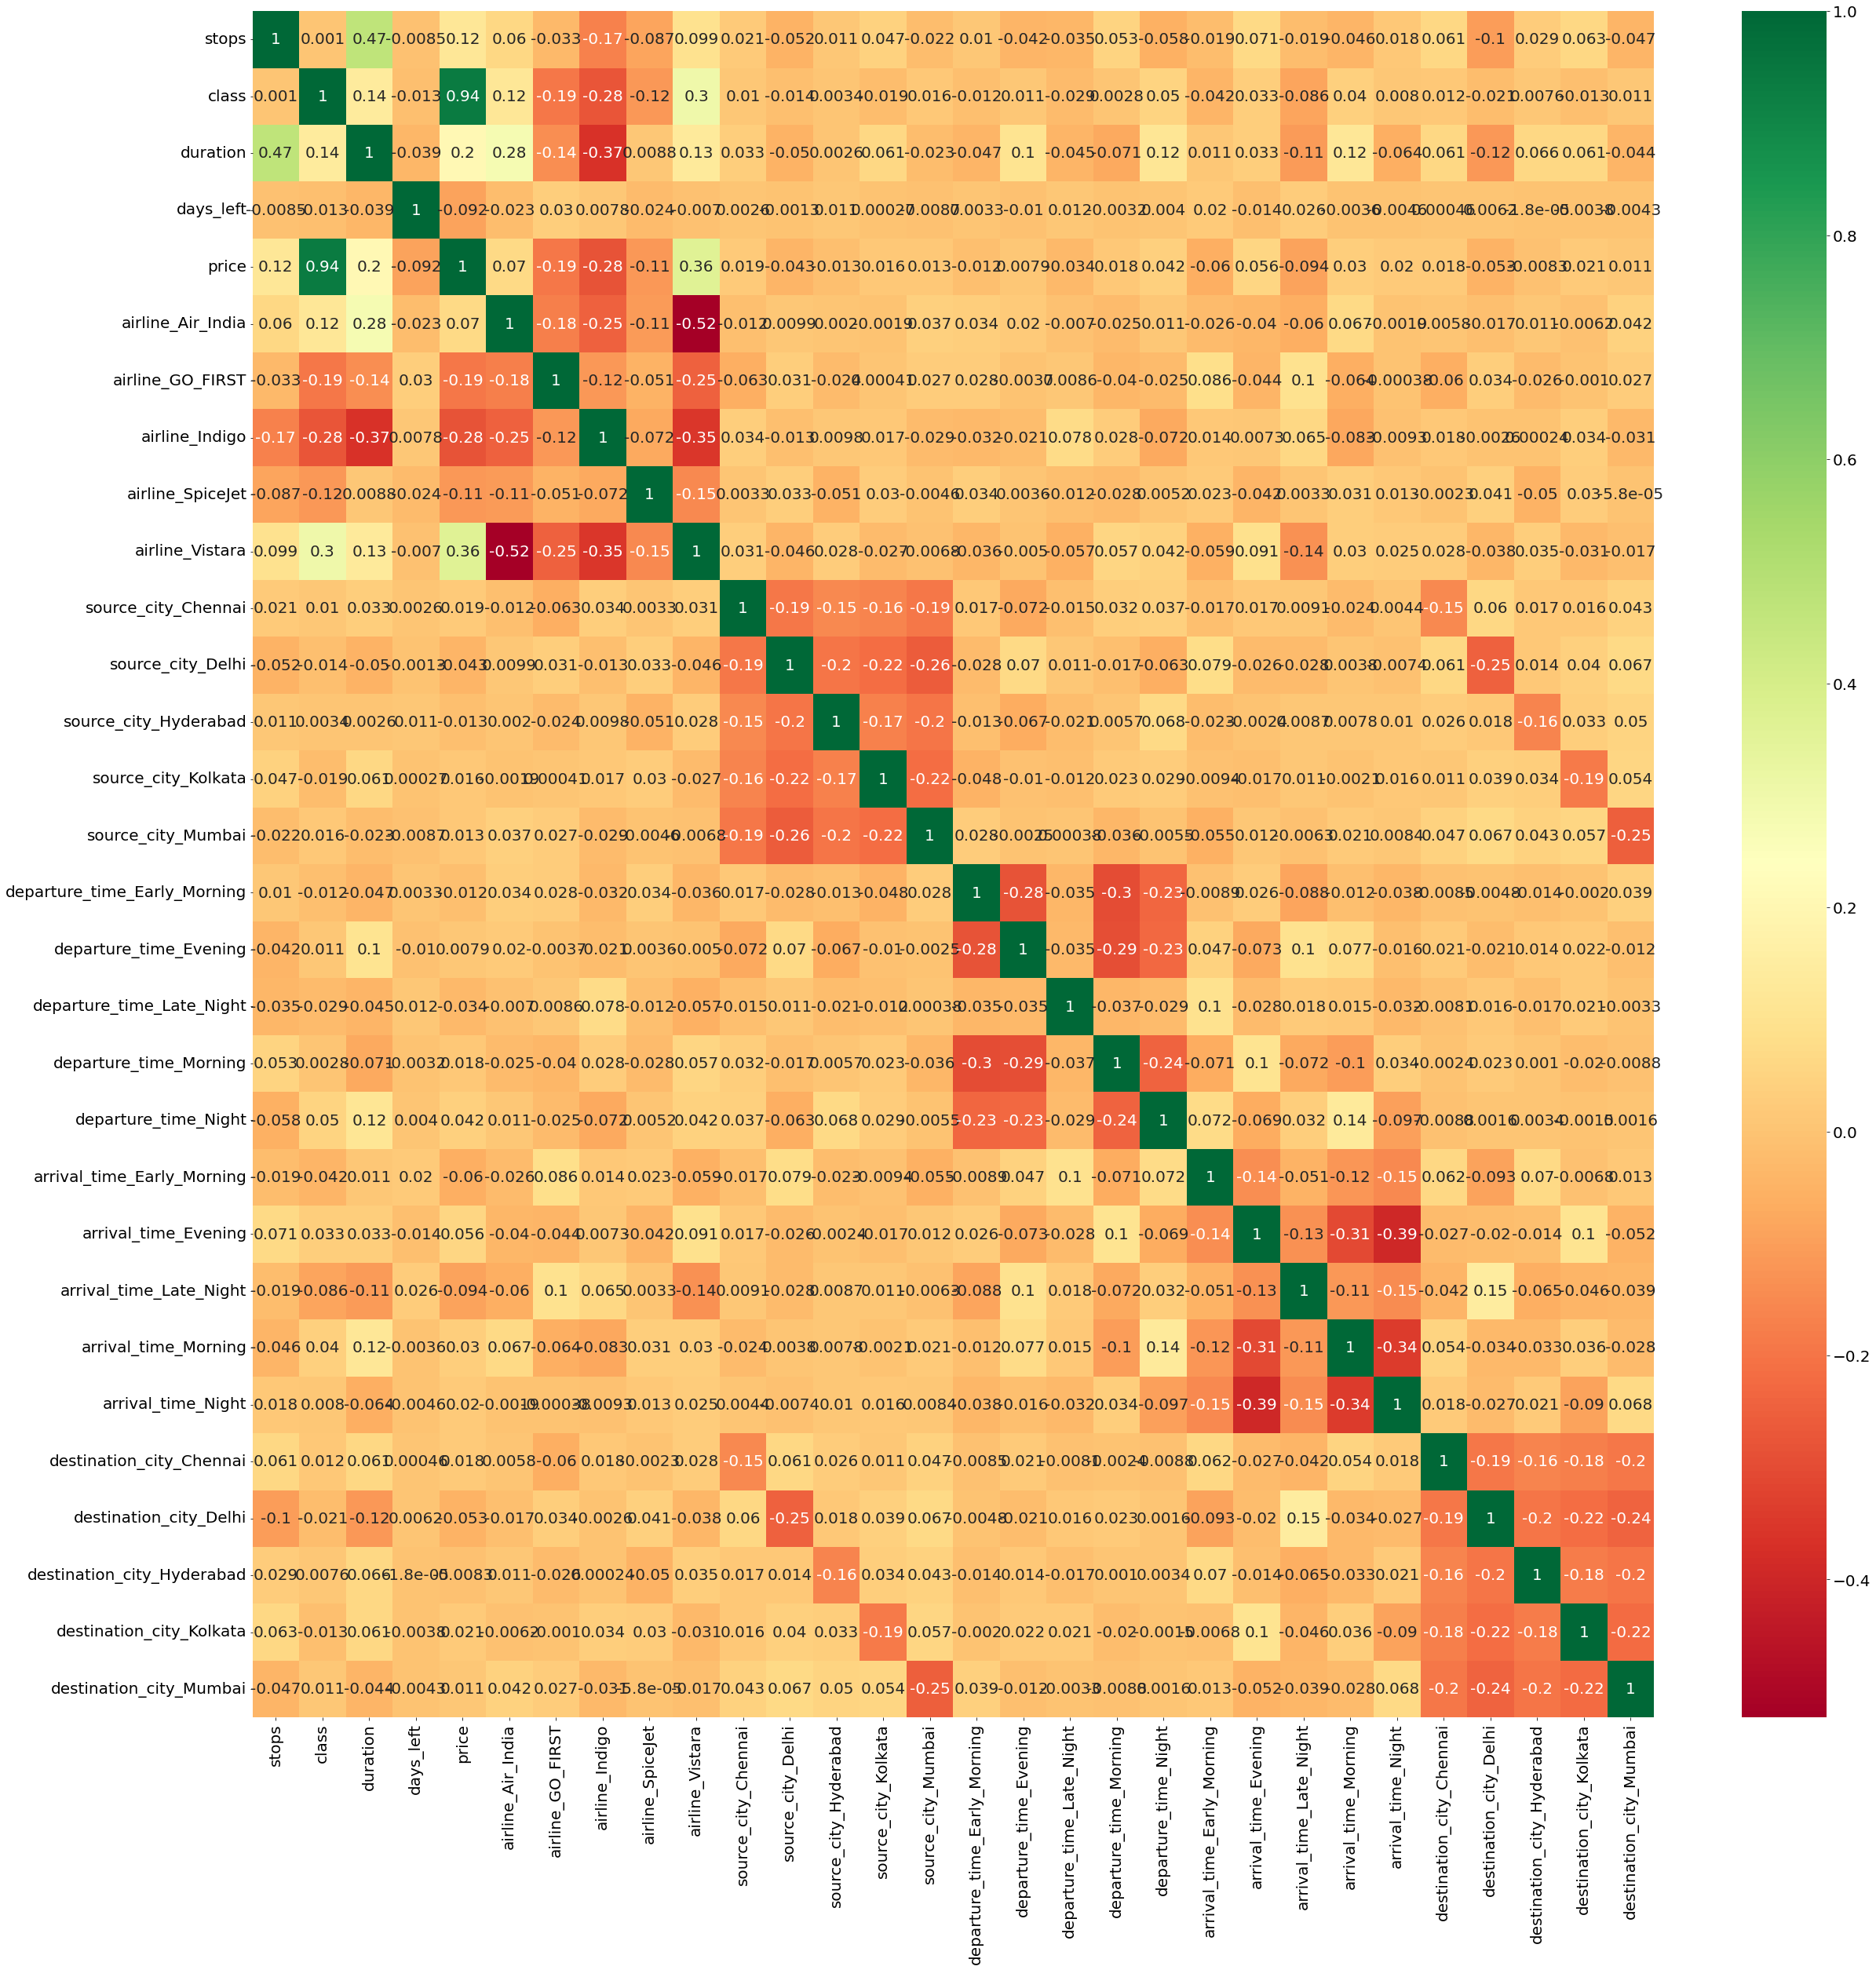

In [62]:
plt.figure(figsize = (40,40))
sns.heatmap(Data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

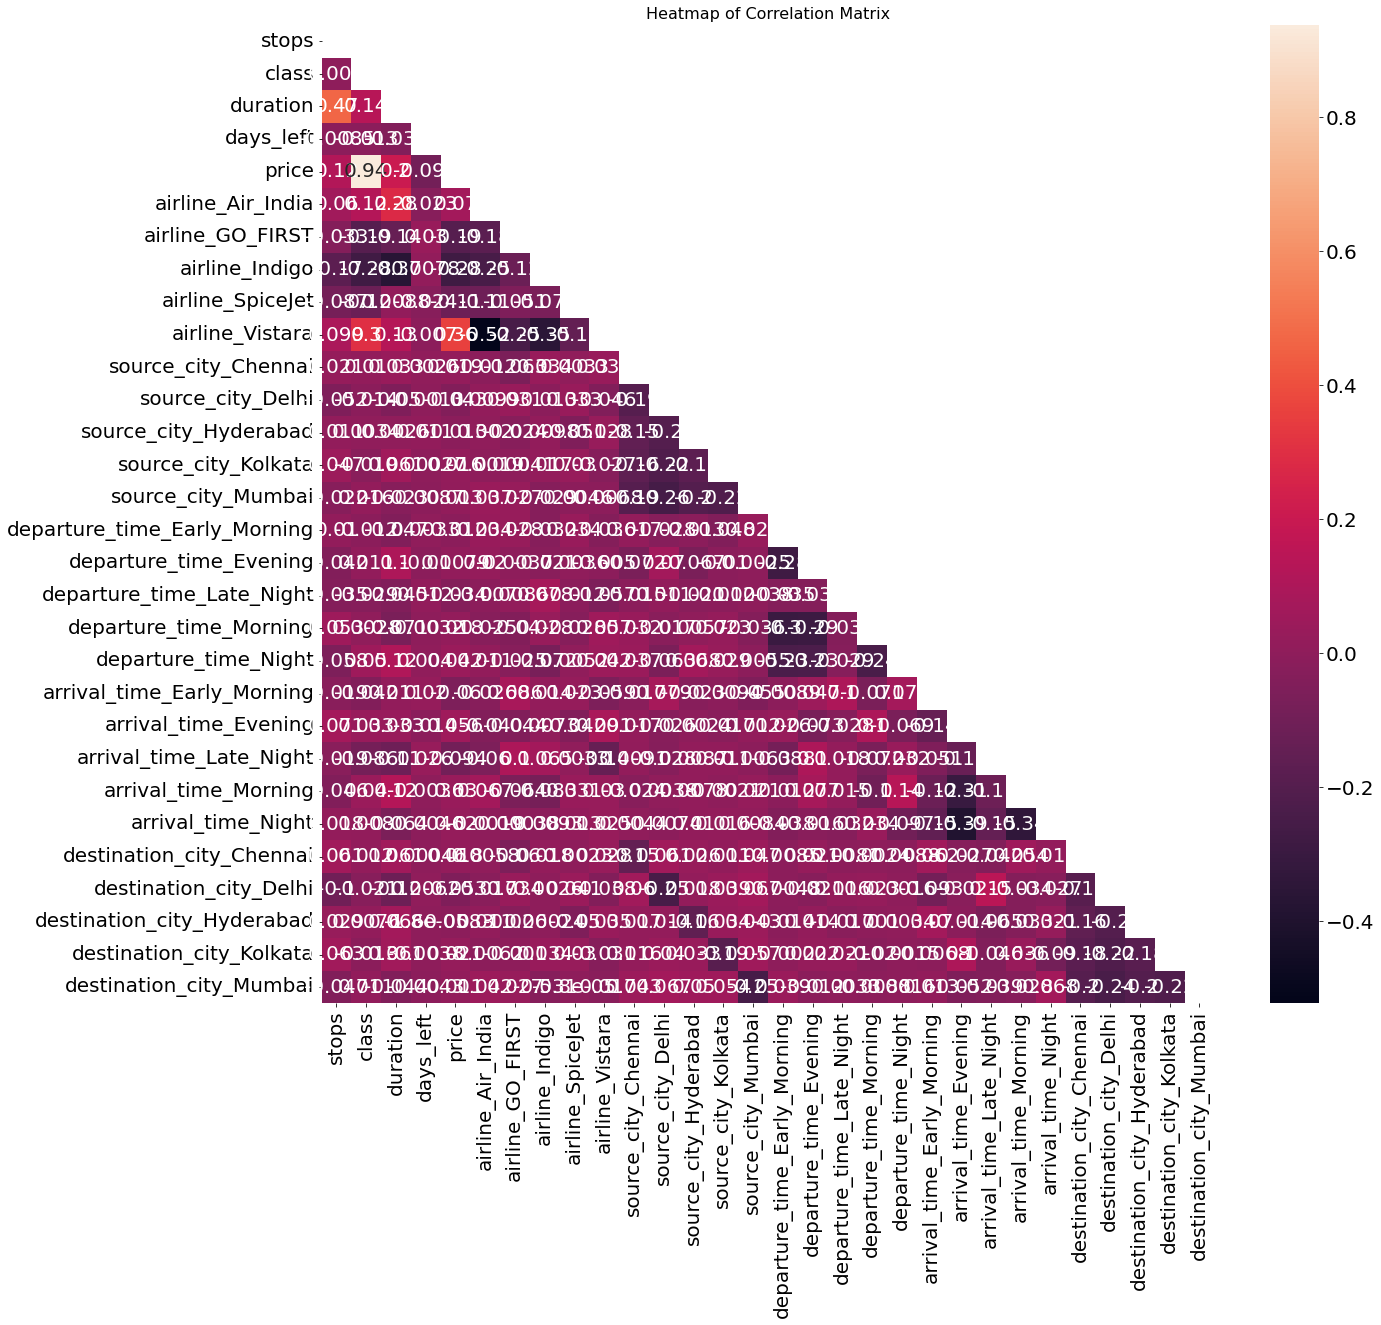

In [63]:
mask = np.triu(np.ones_like(Data.corr(), dtype=bool))
plt.figure(figsize = (20,18))
corrMatrix = Data.corr()
sns.heatmap(corrMatrix, mask=mask, annot=True)
plt.title('Heatmap of Correlation Matrix',fontsize=16)
plt.show()

There is strong correlation with Class and Price. It can be also concluded from the price range analysis in Class detail. In order to understand the predictive power of other features on ticket price, I will also implement mutual information.

In [64]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [65]:
X = Data.copy()
y = X.pop("price")

mi_scores = make_mi_scores(X, y)

In [66]:
print(mi_scores.sort_values(ascending=False))

duration                        2.416936
class                           0.618061
airline_Vistara                 0.516296
days_left                       0.477366
source_city_Delhi               0.431156
source_city_Mumbai              0.429834
airline_Air_India               0.403201
stops                           0.393255
destination_city_Delhi          0.387879
destination_city_Mumbai         0.382828
source_city_Kolkata             0.361059
source_city_Hyderabad           0.347045
destination_city_Kolkata        0.339032
source_city_Chennai             0.326053
destination_city_Hyderabad      0.321119
destination_city_Chennai        0.303286
airline_Indigo                  0.288444
airline_GO_FIRST                0.202520
arrival_time_Evening            0.126667
arrival_time_Night              0.107493
departure_time_Evening          0.104264
arrival_time_Morning            0.098781
departure_time_Morning          0.093396
departure_time_Early_Morning    0.086883
airline_SpiceJet

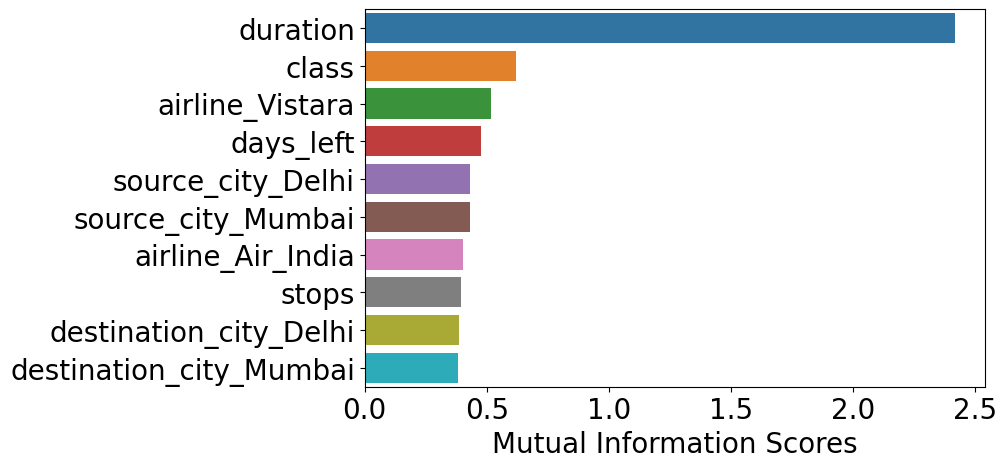

In [67]:



top_10_mi_scores = mi_scores.head(10)

plt.figure(dpi=100, figsize=(8, 5))
sns.barplot(x=top_10_mi_scores, y=top_10_mi_scores.index)
plt.xlabel('Mutual Information Scores')

plt.show()


[3.18467616e-02 8.80370790e-01 2.45616765e-02 1.87937854e-02
 5.58783867e-03 1.90566229e-04 1.68597866e-04 1.38987172e-04
 5.41572953e-03 1.03161299e-03 4.35047476e-03 1.49769501e-03
 2.08793572e-03 2.33380583e-03 1.07654755e-03 1.44948919e-03
 5.44821316e-05 1.33792302e-03 1.01453145e-03 9.18870162e-04
 1.54162356e-03 2.21655278e-04 1.04841364e-03 1.72121636e-03
 1.04655285e-03 4.12622482e-03 1.94229649e-03 2.02840500e-03
 2.09551124e-03]


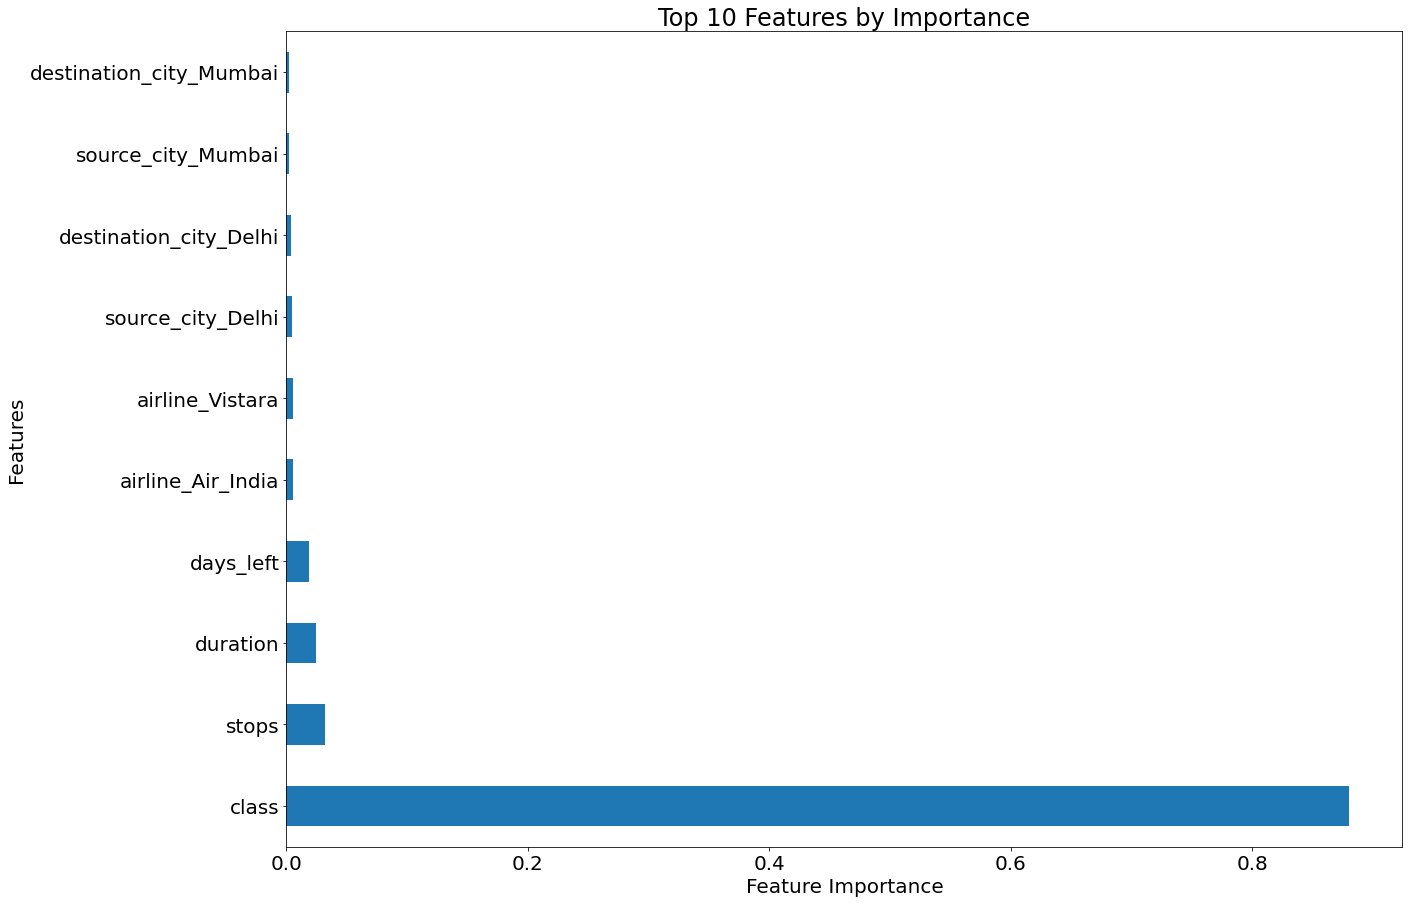

In [68]:


# Create an instance of ExtraTreesRegressor
selection = ExtraTreesRegressor()

# Fit the model to your X and y data
selection.fit(X, y)

# Print feature importances
print(selection.feature_importances_)

# Plot graph of feature importances for better visualization
plt.figure(figsize=(20, 15))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Features by Importance')
plt.show()


In [69]:
# Important feature using ExtraTreesRegressor

#from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [70]:
print(selection.feature_importances_)

[3.04445785e-02 8.80370611e-01 2.61511606e-02 1.87114400e-02
 5.50366485e-03 1.89605195e-04 1.74222245e-04 1.36049539e-04
 5.44230223e-03 1.03281425e-03 4.29586897e-03 1.52093252e-03
 2.04734698e-03 2.36567462e-03 1.07967288e-03 1.46389651e-03
 5.51181862e-05 1.35973136e-03 1.00978543e-03 9.38020449e-04
 1.54148208e-03 2.19792037e-04 1.09451891e-03 1.73473714e-03
 1.04721109e-03 4.07547157e-03 1.93849314e-03 1.94130946e-03
 2.11448797e-03]


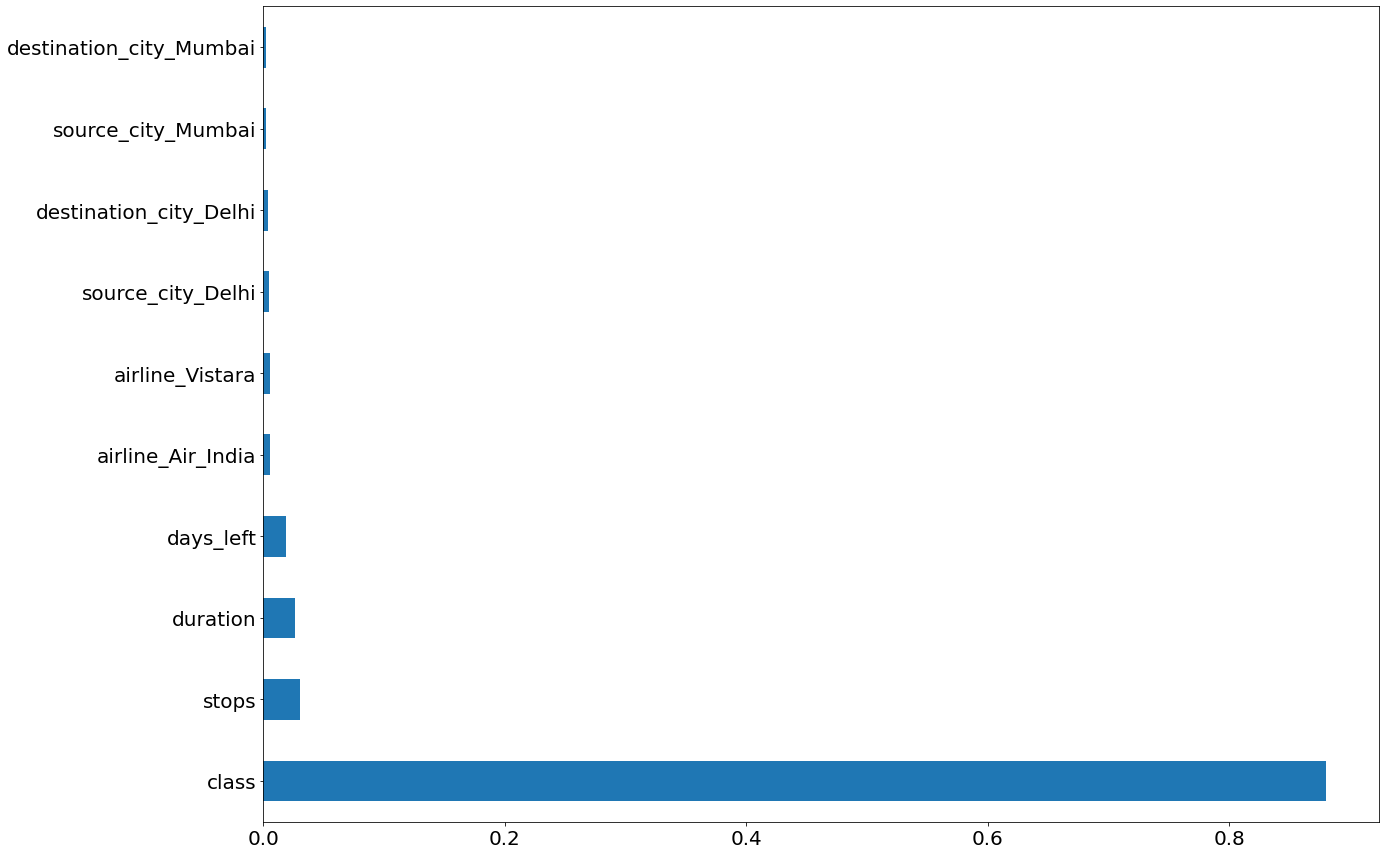

In [71]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (20,15))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()



The top features with higher mutual information scores were:
duration
class
airline_Vistara
days_left
source_city_Delhi
source_city_Mumbai
airline_Air_India
stops
destination_city_Delhi
destination_city_Mumbai

Also, the high mutual information score of whether the airline is Vistara or Air India with ticket price can be related with the fact that they are the airlines who offer business class tickets as other airlines offer only economy class tickets. Since ticket class also has high mutual information score and high linear correlation with price.

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Scale the training set
X_train_scaled = scaler.fit_transform(X_train)

# Scale the testing set using the same scaling parameters
X_test_scaled = scaler.transform(X_test)
y = Data['price']


# Min max scaling

In [74]:
# Define the target variable
Y = Data['price']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection
k_best = SelectKBest(f_regression, k=3)
k_best.fit(X_scaled, Y)

# Get Feature Importance 
feature_scores = k_best.scores_


SelectKBest feature selection method using the f_regression scoring function.

In [75]:
# F-Regresion with SelectKBest
k_best = SelectKBest(f_regression, k=3)

# Fit the model on the data
k_best.fit(X_scaled, Y)

# Get Feature Importance 
feature_scores = k_best.scores_

# Show Scores
print("{:25} {:15}".format("Feature Names", "Score"))
for name, score in zip(X.columns, feature_scores):
    print("{:20}: {:10.3f}".format(name, score))
    
    

Feature Names             Score          
stops               :   4359.295
class               : 2192424.595
duration            :  13063.152
days_left           :   2559.274
airline_Air_India   :   1479.726
airline_GO_FIRST    :  11760.803
airline_Indigo      :  25708.611
airline_SpiceJet    :   3953.429
airline_Vistara     :  44924.836
source_city_Chennai :    105.464
source_city_Delhi   :    563.325
source_city_Hyderabad:     49.400
source_city_Kolkata :     78.080
source_city_Mumbai  :     52.358
departure_time_Early_Morning:     44.919
departure_time_Evening:     18.952
departure_time_Late_Night:    342.656
departure_time_Morning:     99.443
departure_time_Night:    524.549
arrival_time_Early_Morning:   1100.814
arrival_time_Evening:    958.090
arrival_time_Late_Night:   2652.965
arrival_time_Morning:    277.267
arrival_time_Night  :    124.279
destination_city_Chennai:    102.460
destination_city_Delhi:    830.434
destination_city_Hyderabad:     20.641
destination_city_Kolkata:  

SelectKBest feature selection method using the f_regression scoring function.
The top 3 features selected were:
class
airline_Vistara
duration

Based on these results, it appears that the "class" feature is consistently identified as an important feature related to the target variable "price" across different feature selection methods. Other features such as "duration," "airline_Vistara," and "days_left" also show high relevance and importance in predicting the ticket price.

# Model Building and Evaluation

In [76]:
# Define the models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor())
]


In [77]:
# Define hyperparameter grids for tuning
param_grids = [
    {},  # No hyperparameters to tune for Linear Regression
    {"max_depth": [None, 5, 10]},
    {"n_estimators": [100, 200, 300]}
]


In [78]:
# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=["Model Name", "Mean_Absolute_Error", "R2_score"])

In [79]:
# Iterate over models
for model_name, model in models:
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results in the DataFrame
    results = pd.concat([results, pd.DataFrame({"Model Name": model_name, "Mean_Absolute_Error": mae, "R2_score": r2}, index=[0])], ignore_index=True)

In [80]:
# Print the results
print(results)

          Model Name Mean_Absolute_Error  R2_score
0  Linear Regression         4500.712502  0.909903
1      Decision Tree         1180.152502  0.975621
2      Random Forest         1085.251738  0.984743


In this code, the `results` DataFrame is initialized with the specified columns ("Model Name", "Mean_Absolute_Error", "R2_score"). Inside the loop, each model is fitted on the training data using `model.fit()` and then used to predict the target variable for the testing data with `model.predict()`. The mean absolute error (MAE) and R-squared (R2) scores are calculated using the predicted values and the true values (`y_test`).

Finally, the results for each model are appended to the `results` DataFrame using `results.append()`. The `results` DataFrame will contain the model name, mean absolute error, and R-squared score for each model.


The mean absolute error (MAE) represents the average absolute difference between the predicted flight prices and the actual prices. A lower MAE indicates better model performance. In this case, the Random Forest model has the lowest MAE, suggesting it provides more accurate predictions compared to the other models.

The R2 score represents the proportion of the variance in the flight prices that is predictable by the model. It ranges from 0 to 1, with higher values indicating a better fit. The Random Forest model has the highest R2 score, indicating that it explains a larger portion of the variance in the flight prices compared to the other models.

Based on these results, the Random Forest model seems to be the most promising model for predicting flight prices, as it has the lowest MAE and the highest R2 score. However, it's important to note that these results might vary depending on the specific dataset and problem you are working on. It's recommended to further evaluate and fine-tune the models to ensure their robustness and generalizability.

The results show the mean absolute error (MAE) and R2 score for each model. The Linear Regression model has an MAE of approximately 4485.83 and an R2 score of 0.90982. The Decision Tree model has an MAE of around 1183.92 and an R2 score of 0.975269. The Random Forest model has the lowest MAE of approximately 1082.35 and the highest R2 score of 0.984828.

Based on these results, the Random Forest model appears to perform the best, as it has the lowest MAE and highest R2 score. However, it's important to note that the performance of the models can vary depending on the specific dataset and problem at hand. It's recommended to further evaluate and fine-tune the models to ensure their robustness and generalizability.

​

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define the models to evaluate
models = [
    ("Linear Regression", SGDRegressor()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor())
]

# Define the hyperparameter grids for tuning
param_grids = [
    {"alpha": [0.0001, 0.001]},
    {"max_depth": [None, 5]},
    {"n_estimators": [100, 200]}
]

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=["Model Name", "Mean_Absolute_Error", "R2_score"])

# Iterate over models
for model_name, model in models:
    # Find the index of the current model in the models list
    i = next(index for index, (name, _) in enumerate(models) if name == model_name)
    
    # Define the hyperparameter grid for the current model
    param_grid = param_grids[i]
    
    # Perform randomized search
    random_search = RandomizedSearchCV(model, param_grid, scoring='neg_mean_absolute_error', cv=5, n_iter=2, random_state=42)
    random_search.fit(X_train_scaled, y_train)
    
    # Get the best model and its hyperparameters
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    
    # Fit the best model on the training data
    best_model.fit(X_train_scaled, y_train)
    
    # Make predictions on the testing data using the best model
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate evaluation metrics using the best model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results in the DataFrame
    results = pd.concat([results, pd.DataFrame({"Model Name": [model_name], "Mean_Absolute_Error": [mae], "R2_score": [r2]})], ignore_index=True)

# Print the results
print(results)


          Model Name Mean_Absolute_Error  R2_score
0  Linear Regression         4482.290304  0.909839
1      Decision Tree         1184.613697  0.975359
2      Random Forest         1083.512194  0.984781


The results show the mean absolute error (MAE) and R2 score for each model after hyperparameter tuning. The Linear Regression model has an MAE of approximately 4482.29 and an R2 score of 0.909839. The Decision Tree model has an MAE of around 1184.61 and an R2 score of 0.975359. The Random Forest model has the lowest MAE of approximately 1083.51 and the highest R2 score of 0.984781.

Based on these results, the Random Forest model with hyperparameter tuning performs the best, as it has the lowest MAE and highest R2 score. However, it's important to note that the performance of the models can vary depending on the specific dataset and problem at hand

In [174]:
# Save the trained model to a file
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [175]:
import joblib


In [176]:
model = joblib.load('random_forest_model.pkl')


In [183]:
predicted_values = model.predict(X_train_scaled)


In [184]:
print(predicted_values)


[ 5124.58825974  7422.42       13883.         ...  7230.
 13745.63       12024.7       ]


In [190]:
data = X_train_scaled

In [191]:
predictions = model.predict(X_train_scaled)


In [192]:
data['Predicted'] = predictions

In [193]:
data.to_excel('dataset_with_predictions.xlsx', index=False) 

In [196]:
PredData = pd.read_excel('dataset_with_predictions.xlsx')

In [197]:
PredData.head()

,Duration,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Additional Info_1 Short layover,Additional Info_2 Long layover,Additional Info_Business class,Additional Info_Change airports,Additional Info_In-flight meal not included,Additional Info_No Info,Additional Info_No check-in baggage included,Additional Info_No info,Additional Info_Red-eye flight,Predicted
0,170,24,3,22,20,1,10,0,0,0,...,0,0,0,0,0,0,0,1,0,5124.58826
1,445,1,5,5,50,13,15,0,1,0,...,0,0,0,0,0,0,0,1,0,7422.42000
2,1140,9,6,9,25,4,25,0,0,0,...,0,0,0,0,0,0,0,1,0,13883.00000
3,325,12,5,18,5,23,30,0,0,0,...,0,0,0,0,0,0,0,1,0,6314.74000
4,285,1,3,16,50,21,35,0,0,0,...,0,0,0,0,0,0,0,1,0,11942.87000
